# Main 1: Data Pulling and Training set creation

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle




In [2]:
file_list = []
class_list = []

DATADIR = "datasets"

# Categories of neural network to detect
CATEGORIES=["NORMAL","Diabetics"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking or all images in the data folder
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir("/Users/ankitasarkar/Documents/MS Data Science/VITC/1st Year/2. Winter Sem/05. ECE6045 - Neural Network and Fuzzy Systems - Felix A/03. J Component/Tongue /00.01 [Codes] /01. Data Sets/crop images"):
        img_array = cv2.imread(os.path.join("/Users/ankitasarkar/Documents/MS Data Science/VITC/1st Year/2. Winter Sem/05. ECE6045 - Neural Network and Fuzzy Systems - Felix A/03. J Component/Tongue /00.01 [Codes] /01. Data Sets/crop images", img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.equalizeHist(img_array)
       



In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir("/Users/ankitasarkar/Documents/MS Data Science/VITC/1st Year/2. Winter Sem/05. ECE6045 - Neural Network and Fuzzy Systems - Felix A/03. J Component/Tongue /00.01 [Codes] /01. Data Sets/crop images"):
            try :
                img_array = cv2.imread(os.path.join("/Users/ankitasarkar/Documents/MS Data Science/VITC/1st Year/2. Winter Sem/05. ECE6045 - Neural Network and Fuzzy Systems - Felix A/03. J Component/Tongue /00.01 [Codes] /01. Data Sets/crop images", img), cv2.IMREAD_GRAYSCALE) 
                img_array = cv2.equalizeHist(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels



In [4]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)




# Main2: CNN Model Creation 

In [5]:
import tensorflow as tf 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

2023-06-14 14:17:11.273440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Opening the files about data
#X = pickle.load(open("X.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))


X = X/255.0
y=np.array(y)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(4))
model.add(Activation("softmax"))

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Print the model summary
model.summary()

# Apply data augmentation to training data
train_data = datagen.flow(X_train, y_train, batch_size=64)

# Train the model with augmented training data and validate with validation data
history = model.fit(train_data, epochs=20, validation_data=(X_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                    

2023-06-14 14:17:15.544536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
3/3 [==============================] - 1s 118ms/step - loss: 1.2785 - accuracy: 0.5027 - val_loss: 1.0913 - val_accuracy: 0.4286
Epoch 2/20
3/3 [==============================] - 0s 47ms/step - loss: 0.9823 - accuracy: 0.5082 - val_loss: 0.7980 - val_accuracy: 0.4286
Epoch 3/20
3/3 [==============================] - 0s 47ms/step - loss: 0.7386 - accuracy: 0.5027 - val_loss: 0.6914 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 0s 51ms/step - loss: 0.7158 - accuracy: 0.4863 - val_loss: 0.6912 - val_accuracy: 0.5714
Epoch 5/20
3/3 [==============================] - 0s 46ms/step - loss: 0.7651 - accuracy: 0.4918 - val_loss: 0.6933 - val_accuracy: 0.5714
Epoch 6/20
3/3 [==============================] - 0s 46ms/step - loss: 0.7667 - accuracy: 0.4262 - val_loss: 0.7838 - val_accuracy: 0.4286
Epoch 7/20
3/3 [==============================] - 0s 46ms/step - loss: 0.7584 - accuracy: 0.4645 - val_loss: 0.7107 - val_accuracy: 0.5714
Epoch 8/20
3/3 [==========

In [8]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
 json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


INFO:tensorflow:Assets written to: CNN.model/assets


INFO:tensorflow:Assets written to: CNN.model/assets


In [9]:
# Printing a graph showing the accuracy changes during the training phase
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
acc=np.array(acc)
val_acc=np.array(val_acc)
loss=np.array(loss)
val_loss=np.array(val_loss)
epochs_range = range(20)

Text(0.5, 0, 'epoch')

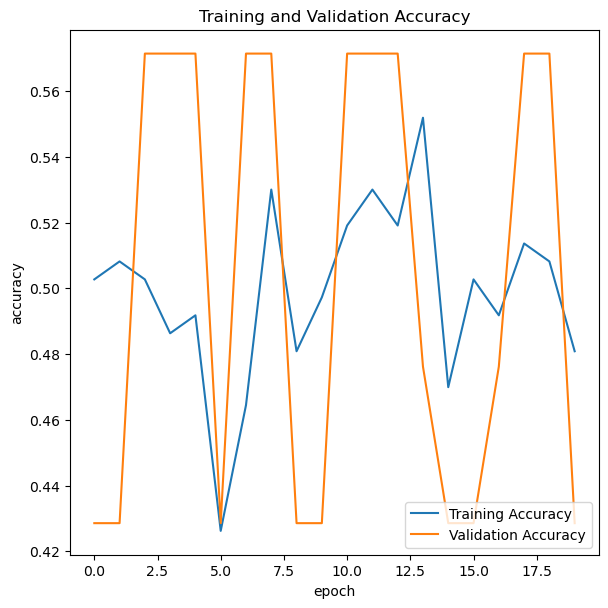

In [10]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

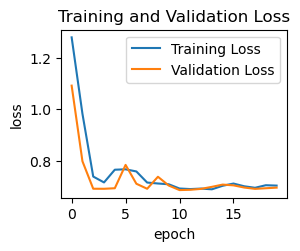

In [11]:
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Final: Interface Creation 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from keras.models import load_model
from tkinter import *
import tkinter.messagebox
import PIL.Image
import PIL.ImageTk
from tkinter import filedialog

CATEGORIES=["NORMAL","Diabetics"]


In [13]:
root = Tk()
root.title("Diabetes Detection")
root.state('zoomed')
root.configure(bg='#D3D3D3')
root.resizable(width = True, height = True) 
value = StringVar()
panel = Label(root)
model = tf.keras.models.load_model("CNN.model")


In [14]:
def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.equalizeHist(img_array)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
def detect(filename):
    prediction = model.predict(prepare(filename))
    prediction = list(prediction[0])
    print(prediction)
    l=CATEGORIES[prediction.index(max(prediction))]
    print(CATEGORIES[prediction.index(max(prediction))])
    value.set(CATEGORIES[prediction.index(max(prediction))])
    i=int(prediction.index(max(prediction)))

In [15]:
def ClickAction(event=None):
    filename = filedialog.askopenfilename()
    img = PIL.Image.open(filename)
    img = img.resize((250,250))
    img = PIL.ImageTk.PhotoImage(img)
    global panel
    panel = Label(root, image = img)
    panel.image = img
    panel = panel.place(relx=0.435,rely=0.3)
    detect(filename)

In [ ]:
button = Button(root, text='CHOOSE THE IMAGE', font=(None, 18), activeforeground='red', bd=20, bg='red', relief=RAISED, height=3, width=20, command=ClickAction)
button = button.place(relx=0.40, rely=0.05)
result = Label(root, textvariable=value, font=(None, 20))
result = result.place(relx=0.465,rely=0.7)
root.mainloop()


2023-06-14 14:17:23.963 python[41277:635438] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1.11 secs).
2023-06-14 14:18:57.115 python[41277:635438] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 91ms/step
[0.84389514, 0.1561049, 0.0, 0.0]
NORMAL


2023-06-14 14:19:01.638 python[41277:635438] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 17ms/step
[0.93593454, 0.064065434, 0.0, 0.0]
NORMAL


2023-06-14 14:19:04.534 python[41277:635438] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 18ms/step
[0.7038167, 0.29618326, 0.0, 0.0]
NORMAL


2023-06-14 14:19:07.954 python[41277:635438] +[CATransaction synchronize] called within transaction


1/1 [==============================] - 0s 17ms/step
[0.039604004, 0.96039605, 0.0, 0.0]
Diabetics
